# <a name="C"> SOMMAIRE <a/>
    
**<a href="#C0"> Classification non supervisée : </a>**  

Après exploration des données, nous allons utilisés deux (2) algorithmes pour la classification. ce sont :

+ Convolutional Neural Network (CNN)
+ Scale-Invariant Feature Transform (SIFT)
    
    
 
    
**<a href="#C1"> I.) Explorattion du dataset images </a>**
  - <a href ="#C11"> 1.1) Affichage des données </a>
  - <a href ="#C12"> 1.2) Opérations de traitement d'images </a>
   + <a href ="#C121"> 1.2.1) Passage en gris </a>
   + <a href ="#C122"> 1.2.2) Egalisation </a>
   + <a href ="#C123"> 1.2.3) Filtrage du bruit </a>
   + <a href ="#C124"> 1.2.4) Floutage moyen </a>
  - <a href ="#C13"> 1.3) Création des labels </a>
  - <a href ="#C14"> 1.4) Affichage d'exemples d'images par label </a>
  - <a href ="#C15"> 1.5) Renommer les images </a>
  - <a href ="#C16"> 1.6) Exporter en csv </a>
 
 
**<a href="#C2"> II.) Algorithme SIFT </a>**
 - <a href ="#C21"> 2.1) Pré-traitement des images via SIFT </a>
  + <a href ="#C211"> 2.1.1) Détermination et affichage des keypoints sur une image </a>
  + <a href ="#C212"> 2.1.2) Détermination des descripteurs de chaque image </a>
  + <a href ="#C213"> 2.1.3) Dénombrer les clusters des descripteurs </a> 
 - <a href ="#C22"> 2.2) Extraction des fonctionnalités via SIFT </a>
  + <a href ="#C221"> 2.2.1) Extraction des features des images </a>
  + <a href ="#C222"> 2.2.2) Réductions de dimension </a>
 - <a href ="#C23"> 2.3) Création de clusters </a>
 - <a href ="#C24"> 2.4) Visualisation et Analyse </a>
  + <a href ="#C241"> 2.4.1) Analyse visuelle : affichage T-SNE selon catégories d'images </a>
  + <a href ="#C242"> 2.4.2) Analyse mesures : similarité entre catégories et clusters </a>
 - <a href ="#C25"> 2.5) Evaluation du modèle SIFT </a>
  + <a href ="#C251"> 2.5.1) Analyse de similarité entre catégories et clusters (ARI) </a>
  + <a href ="#C252"> 2.5.2) Analyse de précision entre catégories et clusters (Accuracy) </a>
  
  
  **<a href="#C3"> III.) Algorithme CNN </a>**
 - <a href ="#C31"> 3.1) Pré-traitement des images </a>
 - <a href ="#C32"> 3.2) Extraction de Features </a>
  + <a href ="#C321"> 3.2.1) Extraction des features des images </a>
  + <a href ="#C322"> 3.2.2) Réductions de dimension </a>
 - <a href ="#C33"> 3.3) Création de clusters </a>
 - <a href ="#C34"> 3.4) Visualisation et Analyse </a>
  + <a href ="#C341"> 3.4.1) Analyse visuelle : affichage T-SNE selon catégories d'images </a>
  + <a href ="#C342"> 3.4.2) Analyse visuelle : affichage T-SNE selon clusters </a>
 - <a href ="#C35"> 3.5) Evaluation du modèle CNN </a>
  + <a href ="#C351"> 3.5.1) Analyse de similarité entre catégories et clusters (ARI) </a>
  + <a href ="#C352"> 3.5.2) Analyse de précision entre catégories et clusters (Accuracy) </a>

# Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importation de dataset

In [2]:
from PIL import Image
from os import listdir

# Chemin vers le dossier contenant les images
dossier_images = "./Flipkart/images/"

# Compter le nombre fichier image dans le dossier
list_photos = [file for file in listdir(dossier_images)]
print(len(list_photos))

1050


In [3]:
# Mettre la liste sous forme de dataframe
data_images = pd.DataFrame({"Noms images": list_photos})
data_images.head()

,Noms images
0,009099b1f6e1e8f893ec29a7023153c4.jpg
1,0096e89cc25a8b96fb9808716406fe94.jpg
2,00cbbc837d340fa163d11e169fbdb952.jpg
3,00d84a518e0550612fcfcba3b02b6255.jpg
4,00e966a5049a262cfc72e6bbf68b80e7.jpg


# <a name="C1"> I.) Exploration du dataset images <a/>

## <a name="C11"> 1.1) Affichage d'images <a/>

In [4]:
from PIL import Image
import os

# Chemin vers le répertoire contenant les images
dossier_images = "./Flipkart/images/"

# Liste pour stocker les objets Image
liste_images = []

# Parcourir les fichiers du dossier
for fichier in os.listdir(dossier_images):
    if fichier.endswith(('.jpg', '.jpeg', '.png', '.gif')):
        chemin_complet = os.path.join(dossier_images, fichier)
        image = Image.open(chemin_complet)
        liste_images.append(image)

C:\Users\dmedc\anaconda3\lib\site-packages\PIL\Image.py:2896: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


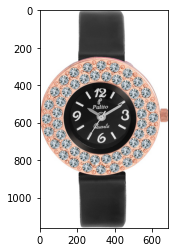

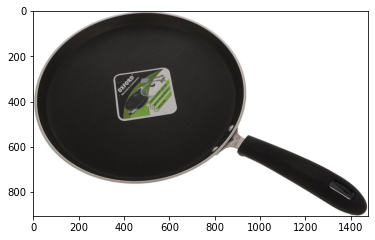

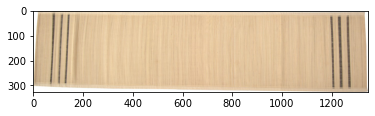

In [5]:
# Afficher les trois premières images de la liste
for i in range(3):
    plt.figure() # Créeer une zone de dessin pour afficher les images
    plt.imshow(liste_images[i]) # afficher l'image à l'aide d'une représentation matricielle
    plt.axis('ON')  # Afficher les axes
    plt.show()

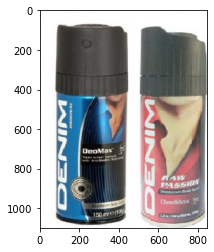

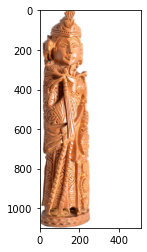

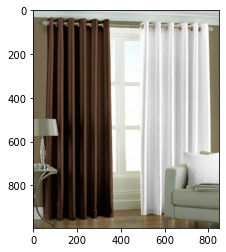

In [6]:
# Afficher 3 images au hasard
import random
indices_aleatoires = random.sample(range(len(liste_images)), 3)

for index in indices_aleatoires:
    plt.figure()
    plt.imshow(liste_images[index])
    plt.axis('on')  # Masquer les axes
    plt.show()

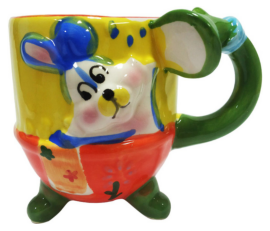

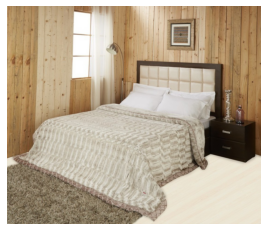

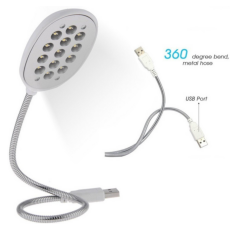

In [7]:
# Afficher les 5 dernières images de la liste
taille_liste = len(liste_images)
for i in range(taille_liste - 3, taille_liste):
    plt.figure()
    plt.imshow(liste_images[i])
    plt.axis('off')  # Masquer les axes
    plt.show()

## <a name="C12"> 1.2) Opérations de traitement d'images <a/>

Nous allons procéder à des opérations de retrait d'images (par exemple passage en gris, filtrage du bruit, égalisation, floutage) 

In [8]:
# Enregistrez l'une des images dans la variable 'img'
img = liste_images[1048]
data_images.iloc[1048]

Noms images    ffc2e1fc7c886ec09a331040ada038aa.jpg
Name: 1048, dtype: object

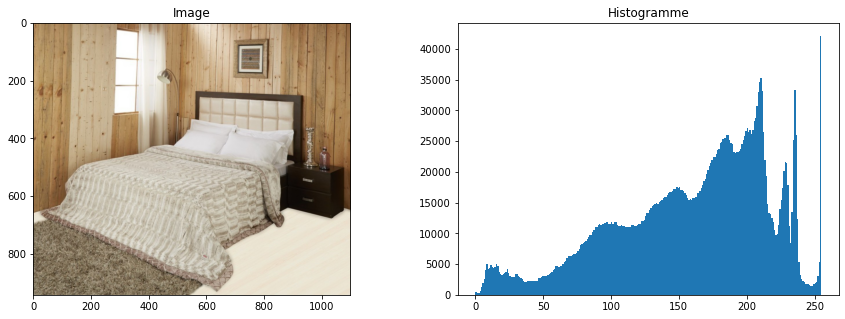

In [9]:
# Definir le cadre des image
plt.figure(figsize=(15, 5))

# Affichez l'image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Image")

# Charger l'image comme matrice de pixels
imge = np.array(Image.open('./Flipkart/images/ffc2e1fc7c886ec09a331040ada038aa.jpg'))
# Afficher l'Histogramme
plt.subplot(1, 2, 2)
n, bins, patches = plt.hist(imge.flatten(), bins=range(256))
plt.title("Histogramme")

plt.show()

### <a name="C121"> 1.2.1) Passage en gris <a/>

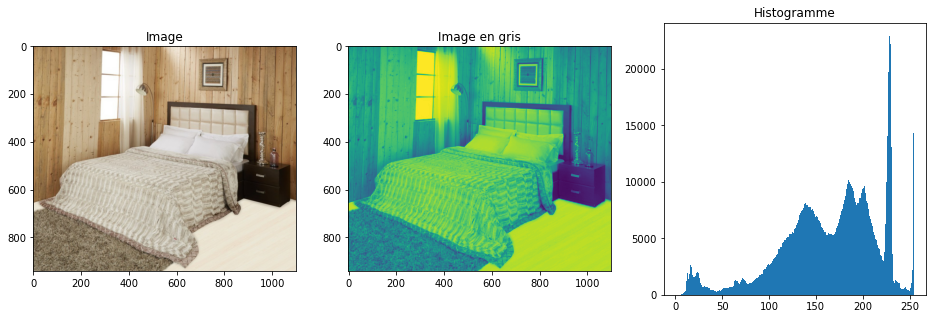

In [10]:
# Convertissez l'image en niveaux de gris (grayscale) 
img_gray = img.convert("L")

# Definir le cadre des image
plt.figure(figsize=(16, 5))

# Affichez l'image originale
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Image")

# Affichez l'image en de gris
plt.subplot(1, 3, 2)
plt.imshow(img_gray)
plt.title("Image en gris")

# Affichez l'histogramme
plt.subplot(1, 3, 3)
img_gray_hist = np.array(img_gray)
n, bins, patches = plt.hist(img_gray_hist.flatten(), bins=range(256))
plt.title("Histogramme")

plt.show()

### <a name="C122"> 1.2.2) Egalisation <a/>

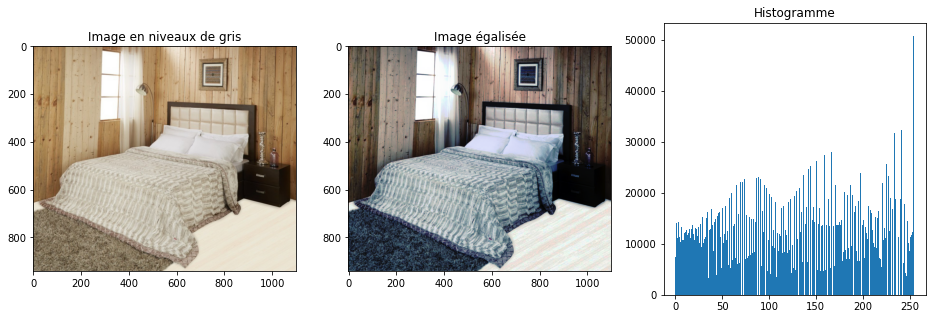

In [11]:
from PIL import Image, ImageOps  

# Égalisation de l'image
img_egale = ImageOps.equalize(img)

# Definir le cadre des image
plt.figure(figsize=(16, 5))

# Affichez l'image originale 
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Image en niveaux de gris")

# Affichez l'image égalisée
plt.subplot(1, 3, 2)
plt.imshow(img_egale, cmap='gray')
plt.title("Image égalisée")

# Affichez l'histogramme
plt.subplot(1, 3, 3)
img_egale_hist = np.array(img_egale)
n, bins, patches = plt.hist(img_egale_hist.flatten(), bins=range(256))
plt.title("Histogramme")

plt.show()

### <a name="C123"> 1.2.3) filtrage du bruit <a/>

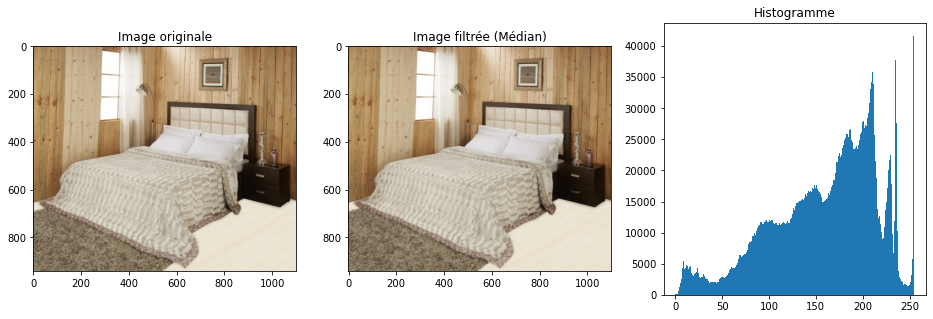

In [12]:
from PIL import Image, ImageFilter

# Appliquez le filtrage médian
img_filtree = img.filter(ImageFilter.MedianFilter(size=3)) 

# Definir le cadre des image
plt.figure(figsize=(16, 5))

# Affichez l'image originale
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Image originale")

# Affichez l'image filtrée
plt.subplot(1, 3, 2)
plt.imshow(img_filtree)
plt.title("Image filtrée (Médian)")

# Affichez l'histogramme
plt.subplot(1, 3, 3)
img_filtree_hist = np.array(img_filtree)
n, bins, patches = plt.hist(img_filtree_hist.flatten(), bins=range(256))
plt.title("Histogramme")

plt.show()

### <a name="C124"> 1.2.4) Floutage moyen <a/>

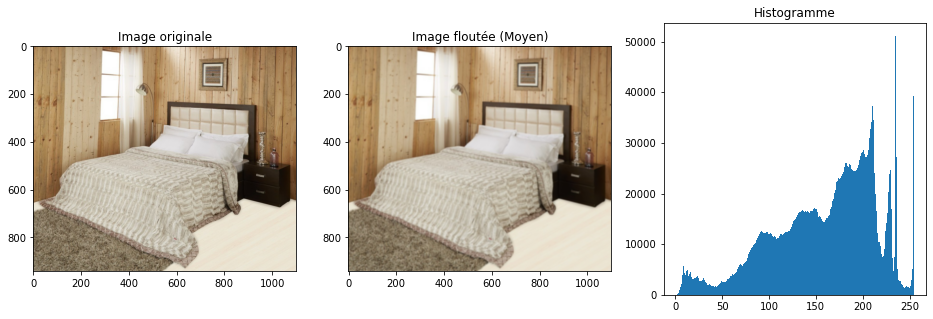

In [13]:
# Appliquez le flou moyen
img_floutee = img.filter(ImageFilter.BLUR)

# Definir le cadre des image
plt.figure(figsize=(16, 5))

# Affichez l'image originale 
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Image originale")

# Affichez l'image floutée
plt.subplot(1, 3, 2)
plt.imshow(img_floutee)
plt.title("Image floutée (Moyen)")

# Affichez l'histogramme
plt.subplot(1, 3, 3)
img_floutee_hist = np.array(img_floutee)
n, bins, patches = plt.hist(img_floutee_hist.flatten(), bins=range(256))
plt.title("Histogramme")

plt.show()

## <a name="C13"> 1.3) Création des labels <a/>

In [14]:
data = pd.read_csv('data.csv')
data = data.drop(['product_name', 'is_FK_Advantage_product', 'discounted_price', 'description', 'brand' ], axis=1)
data.head()

,image,category
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing


In [15]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data["label"] = le.fit_transform(data["category"])
data.sample(5)

,image,category,label
540,19a570b6717955a8c48e5f280617ef24.jpg,Watches,6
931,60395c709b4a933319e2713e3ae620d4.jpg,Home Furnishing,4
900,d3f4a4336324a3d180de23df1e75b9b7.jpg,Beauty and Personal Care,1
979,c44a5dc5b5ebe5b3e0535b7c2b7921e4.jpg,Baby Care,0
949,f41761a931135c6c043c7e04abda41b0.jpg,Home Furnishing,4


In [16]:
dd = pd.merge(data_images, data, left_on='Noms images', right_on='image')
data = dd.drop(['Noms images'], axis=1)
data.head()

,image,category,label
0,009099b1f6e1e8f893ec29a7023153c4.jpg,Watches,6
1,0096e89cc25a8b96fb9808716406fe94.jpg,Kitchen & Dining,5
2,00cbbc837d340fa163d11e169fbdb952.jpg,Home Furnishing,4
3,00d84a518e0550612fcfcba3b02b6255.jpg,Beauty and Personal Care,1
4,00e966a5049a262cfc72e6bbf68b80e7.jpg,Computers,2


In [17]:
data.groupby("label").count()

,image,category
label,,
0,150,150
1,150,150
2,150,150
3,150,150
4,150,150
5,150,150
6,150,150


In [18]:
data["category"].unique()

array(['Watches ', 'Kitchen & Dining ', 'Home Furnishing ',
       'Beauty and Personal Care ', 'Computers ',
       'Home Decor & Festive Needs ', 'Baby Care '], dtype=object)

In [19]:
list_labels = ['Home Furnishing ', 'Baby Care ', 'Watches ','Home Decor & Festive Needs ', 'Kitchen & Dining ',
               'Beauty and Personal Care ', 'Computers ']

## <a name="C14"> 1.4) Affichage d'exemples d'images par label <a/>

In [20]:
from matplotlib.image import imread

def list_fct(name) :
    list_image_name = [list_photos[i] for i in range(len(data)) if data["category"][i]==name]
    return list_image_name

In [21]:
list_Home_Furnishing =[list_photos[i] for i in range(len(data)) if data["category"][i]=="Home Furnishing"]

list_Baby_Care =[list_photos[i] for i in range(len(data)) if data["category"][i]=="Baby Care"]

list_Watches =[list_photos[i] for i in range(len(data)) if data["category"][i]=="Watches"]

list_Home_Decor_Festive_Needs =[list_photos[i] for i in range(len(data)) if data["category"][i]=="Home Decor & Festive Needs"]

list_Kitchen_Dining =[list_photos[i] for i in range(len(data)) if data["category"][i]=="Kitchen & Dining"]

list_Beauty_Personal_Car =[list_photos[i] for i in range(len(data)) if data["category"][i]=="Beauty and Personal Care"]

list_Computers =[list_photos[i] for i in range(len(data)) if data["category"][i]=="Computers"]

Home Furnishing 


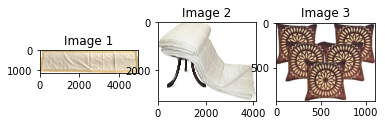

Baby Care 


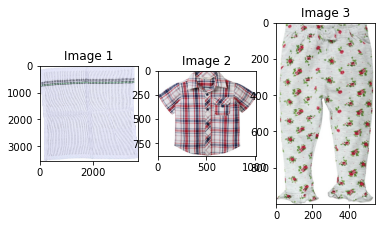

Watches 


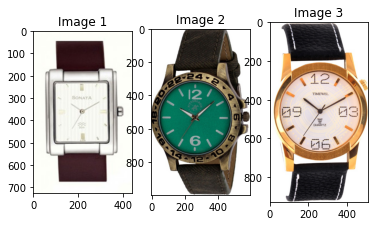

Home Decor & Festive Needs 


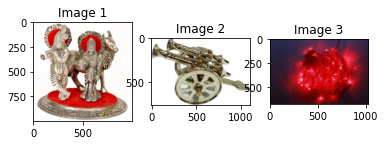

Kitchen & Dining 


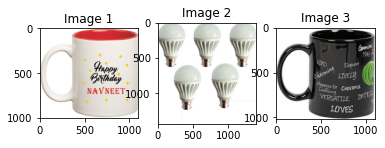

Beauty and Personal Care 


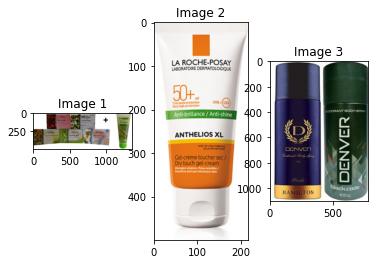

Computers 


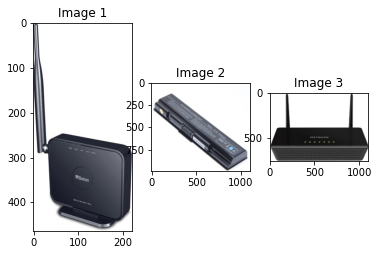

In [22]:
# afficher un aperçu visuel des images correspondant à chaque étiquette dans une liste donnée.*

for name in list_labels:
    print(name)
    for i in range(3):
        subplot_number = 131 + i
        if i < len(list_fct(name)) - 10:
            filename = dossier_images + list_fct(name)[i + 10]
            image = imread(filename)
            plt.subplot(subplot_number)
            plt.imshow(image, cmap='gray')  # You can specify the colormap as needed
            plt.title(f"Image {i + 1}")
        else:
            # Handle the case when there are not enough images in the list
            plt.subplot(subplot_number)
            plt.axis('off')  # Turn off the axis for empty subplots
            
    plt.show()

## <a name="C15"> 1.5) Renommer les images <a/>

In [23]:
import os
import shutil

# Définir le chemin vers le répertoire contenant vos images
repertoire_source = "./Flipkart/images/"

# Définir le chemin vers le nouveau répertoire 
repertoire_destination = "./Flipkart/images_renommees/"

# S'Assurer que le répertoire de destination existe, sinon créez-le
if not os.path.exists(repertoire_destination):
    os.makedirs(repertoire_destination)

# Liste des noms de fichiers d'images actuels 
noms_fichiers_images = list_photos
# Créer une liste vide pour chaque colonne
col1_data = []
col2_data = []

# Parcourir la liste des noms de fichiers et renommer les images
for i, nom_actuel in enumerate(noms_fichiers_images):
    nouveau_nom = f"image_{i}.jpg"  # Créer un nouveau nom en utilisant l'index de la boucle
    chemin_actuel = os.path.join(repertoire_source, nom_actuel)
    chemin_nouveau = os.path.join(repertoire_destination, nouveau_nom)

    # Copier l'image dans le nouveau répertoire avec le nouveau nom
    shutil.copy(chemin_actuel, chemin_nouveau)
    
    col1_data.append(nom_actuel)
    col2_data.append(nouveau_nom)
# Créer le dataframe avec les deux colonnes
df = pd.DataFrame({'images': col1_data, 'nouveau_nom': col2_data})

In [24]:
# Fusionner de dataframes 
data_nouv = pd.merge(data, df, left_on='image', right_on='images')
data_nouv = data_nouv.loc[:, ['image', 'nouveau_nom', 'category', 'label']]
data_nouv.sample(5)

,image,nouveau_nom,category,label
17,04f9f818e2d657b873b07578cfe2eade.jpg,image_17.jpg,Home Decor & Festive Needs,3
611,91e22428c0dd8871288ba5dac35a7382.jpg,image_611.jpg,Beauty and Personal Care,1
207,3847353a4b8de1efc504d589aea74ffe.jpg,image_207.jpg,Kitchen & Dining,5
1002,f4d4c2eec77732f56e47722d7a355f2b.jpg,image_1002.jpg,Home Decor & Festive Needs,3
505,7b72c92c2f6c40268628ec5f14c6d590.jpg,image_505.jpg,Baby Care,0


## <a name="C16"> 1.6) Exporter en csv <a/>

In [25]:
data = data_nouv
# Exporter le fichier
data.to_csv(".\data",index=False)

# <a name="C2"> II.) Algorithme SIFT <a/>
    
SIFT (Scale-Invariant Feature Transform) est un algorithme de vision par ordinateur utilisé pour détecter et décrire des caractéristiques distinctives dans les images. L'idée principale de SIFT est de trouver des points d'intérêt (ou des keypoints) dans une image qui sont invariants aux changements d'échelle, de rotation et d'illumination. 
Il est plus rapide à exécuter et nécessite moins de données d'entraînement.


**NB:** les keypoints sont des points clés détectés dans une image, tandis que les descripteurs sont des vecteurs numériques qui capturent les caractéristiques visuelles de ces points clés
    
######  <a href="#C"> Retour Sommaire <a/>

# Importation de dataset

In [26]:
from PIL import Image
from os import listdir

# Chemin vers le dossier contenant les images
repertoire_destination = "./Flipkart/images_renommees/"

# Compter le nombre fichier image dans le dossier
list_photos = [file for file in listdir(repertoire_destination)]
print(len(list_photos))

1050


In [27]:
data = pd.read_csv('data')
data.head()

,image,nouveau_nom,category,label
0,009099b1f6e1e8f893ec29a7023153c4.jpg,image_0.jpg,Watches,6
1,0096e89cc25a8b96fb9808716406fe94.jpg,image_1.jpg,Kitchen & Dining,5
2,00cbbc837d340fa163d11e169fbdb952.jpg,image_2.jpg,Home Furnishing,4
3,00d84a518e0550612fcfcba3b02b6255.jpg,image_3.jpg,Beauty and Personal Care,1
4,00e966a5049a262cfc72e6bbf68b80e7.jpg,image_4.jpg,Computers,2


In [28]:
list_labels = ['Home Furnishing ', 'Baby Care ', 'Watches ','Home Decor & Festive Needs ', 'Kitchen & Dining ',
               'Beauty and Personal Care ', 'Computers ']

## <a name="C21"> 2.1) Pré-traitement des images via SIFT <a/>

### <a name="C211"> 2.1.1) Détermination des descripteurs et affichage des keypoints sur une image <a/>

In [29]:
pip install opencv-python --upgrade

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


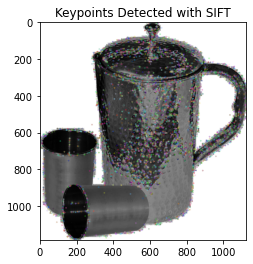

Descripteurs :  (4940, 128)

[[  4.  45.  49. ...   0.  18.   1.]
 [126.   2.   0. ...   0.   3.   8.]
 [  5.  15.  42. ...   0.   0.   3.]
 ...
 [ 50.  47.  45. ...   0.   0.   2.]
 [ 66.  35.   0. ...   0.   0.   1.]
 [ 15.   3.   0. ...   0.   0.   0.]]


In [31]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image
image = cv2.imread(repertoire_destination+list_photos[1000], 0) # l'image en niveaux de gris

# Créer le détecteur SIFT
sift = cv2.SIFT_create()

# equalize image histogram
image = cv2.equalizeHist(image)   

# Détecter les points clés et calculer les descripteurs SIFT
kp, des = sift.detectAndCompute(image, None)

# Dessiner les keypoints sur l'image
img = cv2.drawKeypoints(image,kp,None)
plt.imshow(img)
plt.title('Keypoints Detected with SIFT')
plt.show()

print("Descripteurs : ", des.shape)
print()
print(des)

- L'image contient 4.940 keypoints
- Chaque keypoint est représenté par un descripteur de dimension 128.

### <a name="C212"> 2.1.2) Détermination des descripteurs de chaque image <a/>
    
+ Pour chaque image passage en gris et equalisation
+ création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
+ création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [32]:
import cv2
import os

# Créer un détecteur SIFT avec un maximum de 500 keypoints
sift = cv2.SIFT_create(500)

# Définir le chemin vers le répertoire contenant vos images
repertoire_images = "./Flipkart/images_renommees/"

# Nombre total d'images
nombre_total_images = 1050

# Taille de chaque sous-ensemble
taille_sous_ensemble = 10

In [33]:
import time
temps1=time.time()

# Parcourir les images par sous-ensembles
descripteurs_totale = [] # Liste pour stocker tous les descripteurs
for i in range(0, nombre_total_images, taille_sous_ensemble):
    
    sous_ensemble_images = []
    for j in range(i, min(i + taille_sous_ensemble, nombre_total_images)):
        nom_image = f"image_{j}.jpg"  
        chemin_image = os.path.join(repertoire_images, nom_image)

        # Charger l'image en niveaux de gris
        image = cv2.imread(chemin_image, cv2.IMREAD_GRAYSCALE)
        # equalize image histogram
        image = cv2.equalizeHist(image)   
        
        # Sous-échantillonner l'image pour réduire la résolution
        largeur_nouvelle, hauteur_nouvelle = 200, 200  # Définir la nouvelle taille souhaitée
        image_redimensionnee = cv2.resize(image, (largeur_nouvelle, hauteur_nouvelle))

         # Détecter les keypoints et Calculer les descripteurs SIFT
        keypoints, descripteurs = sift.detectAndCompute(image_redimensionnee, None)    
        
         # Ajouter les descripteurs à la liste du sous-ensemble
        sous_ensemble_images.append(descripteurs)
        
    # Concaténer les descripteurs du sous-ensemble dans la liste totale
    descripteurs_totale.extend(sous_ensemble_images)
    
# Fusionner les tableaux NumPy en un seul
sift_keypoints_all = np.concatenate( descripteurs_totale , axis=0)


duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

print("Nombre de descripteurs : ", sift_keypoints_all.shape)
print()
print(sift_keypoints_all)

temps de traitement SIFT descriptor :            26.63 secondes
Nombre de descripteurs :  (267484, 128)

[[45. 19.  2. ...  0.  0.  1.]
 [ 5.  5.  4. ...  0.  0. 14.]
 [24. 19.  5. ...  0.  0. 10.]
 ...
 [24. 12.  5. ...  0.  0.  6.]
 [ 0.  0. 40. ...  0.  0.  0.]
 [ 7.  0.  0. ...  0.  0.  2.]]


In [34]:
# Imprimer la taille des descripteurs pour chaque image
for i, descriptors in enumerate(descripteurs_totale):
    print(f"Nombre de descripteurs pour l'image {i+1}: {descriptors.shape[0]}")

Nombre de descripteurs pour l'image 1: 212
Nombre de descripteurs pour l'image 2: 41
Nombre de descripteurs pour l'image 3: 347
Nombre de descripteurs pour l'image 4: 201
Nombre de descripteurs pour l'image 5: 147
Nombre de descripteurs pour l'image 6: 49
Nombre de descripteurs pour l'image 7: 100
Nombre de descripteurs pour l'image 8: 82
Nombre de descripteurs pour l'image 9: 264
Nombre de descripteurs pour l'image 10: 272
Nombre de descripteurs pour l'image 11: 232
Nombre de descripteurs pour l'image 12: 232
Nombre de descripteurs pour l'image 13: 56
Nombre de descripteurs pour l'image 14: 197
Nombre de descripteurs pour l'image 15: 347
Nombre de descripteurs pour l'image 16: 202
Nombre de descripteurs pour l'image 17: 438
Nombre de descripteurs pour l'image 18: 443
Nombre de descripteurs pour l'image 19: 398
Nombre de descripteurs pour l'image 20: 80
Nombre de descripteurs pour l'image 21: 330
Nombre de descripteurs pour l'image 22: 129
Nombre de descripteurs pour l'image 23: 356
No

In [35]:
len(sift_keypoints_all)

267484

- L'image contient 267.484 descripteurs
- Chaque descripteur est un vecteur de longueur 128

### <a name="C213"> 2.1.3) Dénombrement de clusters des descripteurs <a/>

In [36]:
from sklearn import cluster, metrics

# Determination number of clusters

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3 * k, random_state=0)

kmeans.fit(sift_keypoints_all)

Nombre de clusters estimés :  517
Création de 517 clusters de descripteurs ...


C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(init_size=1551, n_clusters=517, random_state=0)

 ## <a name="C22"> 2.2) Extraction des Features   <a/>

### <a name="C221"> 2.2.1) Extraction des features des images <a/>
une fonction qui construit un histogramme à partir d'un modèle K-means, des descripteurs et du numéro de l'image.

In [37]:
from sklearn import cluster, metrics

temps1=time.time()

# Creation de histogrammes (features)
def build_histogram(kmeans, descripteurs, image_num):
    res = kmeans.predict(descripteurs) # prédire le cluster auquel chaque descripteur dans descripteurs appartient
    hist = np.zeros(len(kmeans.cluster_centers_)) # initialise  l'histogramme avec des zéros
    nb_des=len(descripteurs) # calcule le nombre de descripteurs dans la variable descripteurs et le stocke dans nb_des.
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    # calculer la fréquence relative de chaque cluster dans les descripteurs.
    for i in res:
        hist[i] += 1.0/nb_des
    return hist

# Creation of la matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(descripteurs_totale) :
    if i%100 == 0 : print(i) # vérifie si l'index i est un multiple de 100 
    hist = build_histogram(kmeans, image_desc, i) # calcule the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")
print()
im_features.shape

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             3.69 secondes



(1050, 517)

### <a name="C222"> 2.2.2) Réductions de dimension <a/>

#### Réduction de dimension PCA

In [38]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 517)
Dimensions dataset après réduction PCA :  (1050, 436)


#### Réduction de dimension T-SNE
Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [39]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)
df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["category"]

print("Dimensions dataset après réduction PCA : ", df_tsne.shape)

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Dimensions dataset après réduction PCA :  (1050, 3)


In [40]:
df_tsne.head()

,tsne1,tsne2,class
0,7.021344,3.124806,Watches
1,8.726089,6.722228,Kitchen & Dining
2,9.684759,-7.445012,Home Furnishing
3,-8.705990,-10.584046,Beauty and Personal Care
4,-7.012537,-12.400152,Computers


## <a name="C23"> 2.3) Création de clusters <a/>

On effectue une classification non supervisée en utilisant l'algorithme **K-means** sur les données X_tsne 

In [41]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


In [42]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    178
1    143
2    194
3    154
4    149
5    140
6     92
Name: class, dtype: int64

#####  Analyse par classes

In [43]:
data_sift = data
data_sift['Label_sift'] = df_tsne["cluster"]
data_sift.head()

,image,nouveau_nom,category,label,Label_sift
0,009099b1f6e1e8f893ec29a7023153c4.jpg,image_0.jpg,Watches,6,0
1,0096e89cc25a8b96fb9808716406fe94.jpg,image_1.jpg,Kitchen & Dining,5,6
2,00cbbc837d340fa163d11e169fbdb952.jpg,image_2.jpg,Home Furnishing,4,5
3,00d84a518e0550612fcfcba3b02b6255.jpg,image_3.jpg,Beauty and Personal Care,1,1
4,00e966a5049a262cfc72e6bbf68b80e7.jpg,image_4.jpg,Computers,2,1


#### Exporter le fichier

In [44]:
data_sift.to_csv(".\data_label",index=False)

## <a name="C24"> 2.4) Visualisation et Analyse <a/>

### <a name="C241"> 2.4.1) Analyse visuelle : affichage T-SNE selon catégories d'images <a/>

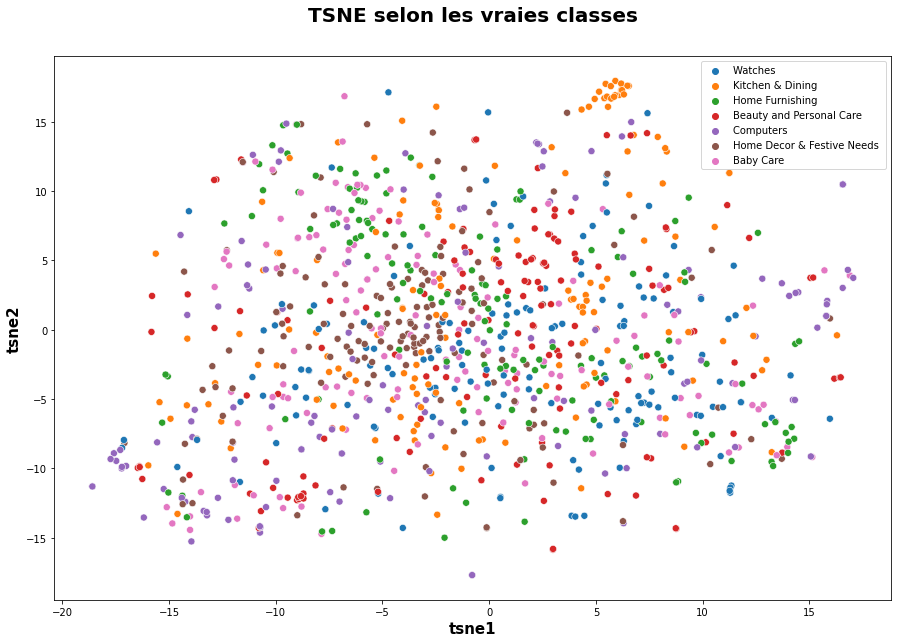

In [45]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50)

plt.title('TSNE selon les vraies classes', fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 15, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 15, fontweight = 'bold')
plt.legend(prop={'size': 10}) 

plt.show()

### <a name="C242"> 2.4.2) Analyse visuelle : affichage T-SNE selon clusters <a/>

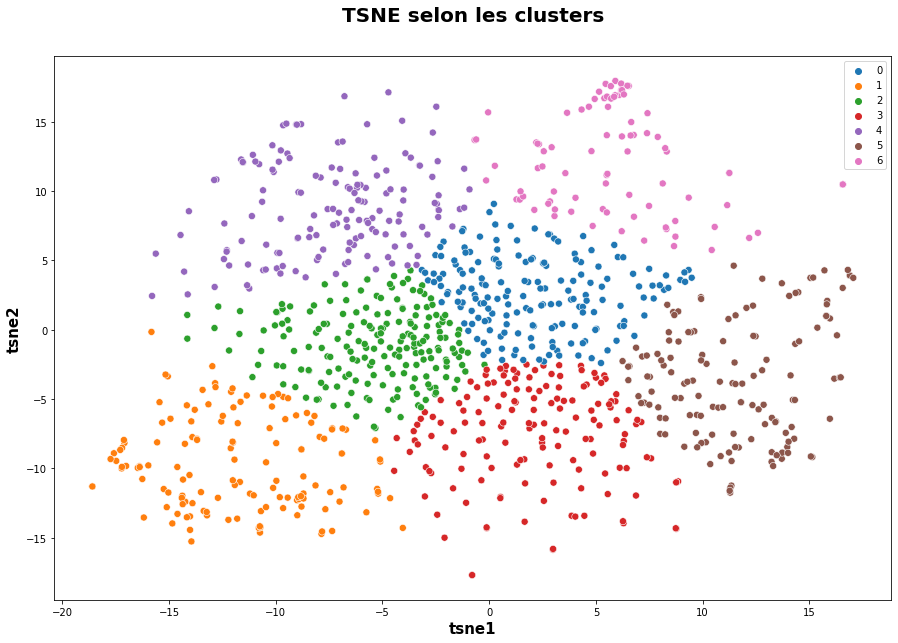

In [46]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="cluster", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50)

plt.title('TSNE selon les clusters', fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 15, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 15, fontweight = 'bold')
plt.legend(prop={'size': 10}) 

plt.show()

## <a name="C25"> 2.5) Evaluation du modèle SIFT<a/>

### <a name="C251"> 2.5.1) Analyse de similarité entre catégories et clusters (ARI) <a/>

In [47]:
# Calcul ARI de similarité catégories images / clusters

labels = data["label"]
print("Score ARI est de : ", metrics.adjusted_rand_score(labels, cls.labels_))

Score ARI est de :  0.04506710093737857


### <a name="C352"> 3.5.2) Analyse de précision entre catégories et clusters (Accuracy) <a/>

#### Matrice de confusion

Elle compare les données réelles pour une variable cible à celles prédites par un modèle. Les prédictions justes et fausses sont révélées et réparties par classe, ce qui permet de les comparer avec des valeurs définies.

In [48]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[19 20 25 18 42 24  2]
 [51 25 13 24  7 15 15]
 [ 9 48 14 15 18 29 17]
 [23 16 64 20 17  5  5]
 [26 11 12 29 40 25  7]
 [20 11 31 19 21 12 36]
 [30 12 35 29  4 30 10]]


La fonction **conf_mat_transform()** utilise une matrice de confusion pour attribuer une correspondance entre les valeurs prédites et les classes réelles, puis elle transforme les valeurs prédites en utilisant cette correspondance

In [49]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # Détermine la correspondance entre les classes originales et transformées
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    
    # Crée un DataFrame pandas avec les vraies étiquettes.
    labels = pd.Series(y_true, name="y_true").to_frame()
    # Ajouter les étiquettes prédites au DataFrame.
    labels['y_pred'] = y_pred
    # Transformer les étiquettes prédites à l'aide de la liste de correspondance obtenue formées au DataFrame.
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

#### Accuracy

In [50]:
cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [1 2 3 4 0 6 5]
[[42 19 20 25 18  2 24]
 [ 7 51 25 13 24 15 15]
 [18  9 48 14 15 17 29]
 [17 23 16 64 20  5  5]
 [40 26 11 12 29  7 25]
 [21 20 11 31 19 36 12]
 [ 4 30 12 35 29 10 30]]

              precision    recall  f1-score   support

           0       0.28      0.28      0.28       150
           1       0.29      0.34      0.31       150
           2       0.34      0.32      0.33       150
           3       0.33      0.43      0.37       150
           4       0.19      0.19      0.19       150
           5       0.39      0.24      0.30       150
           6       0.21      0.20      0.21       150

    accuracy                           0.29      1050
   macro avg       0.29      0.29      0.28      1050
weighted avg       0.29      0.29      0.28      1050



#### Les mesures de performances pour chaque classe et leurs moyennes

+ **Précision** : la précision est le rapport entre les observations positives correctement prédites et le total des observations positives prédites.
+ **Rappel** : le rappel est le rapport entre les observations positives correctement prédites et toutes les observations de la classe réelle.
+ **Score F1** : le score F1 est la moyenne pondérée de la précision et du rappel. Il combine à la fois précision et rappel en une seule métrique.


Voici comment interpréter ces résultats :

+ **accuracy(précision)** : C'est la mesure de l'exactitude du modèle pour chaque classe. Elle représente la proportion d'échantillons correctement prédits comme appartenant à une classe spécifique parmi tous les échantillons prédits comme appartenant à cette classe. Une valeur élevée de précision indique que le modèle fait peu de faux positifs pour cette classe.

+ **recall(rappel)** : C'est la mesure de la sensibilité du modèle pour chaque classe. Elle représente la proportion d'échantillons correctement prédits comme appartenant à une classe spécifique parmi tous les échantillons réels de cette classe. Une valeur de rappel élevée indique que le modèle fait peu de faux négatif pour cette classe.

+ **f1-score**: C'est une mesure qui combine la précision et le rappel en une seule valeur. Elle donne une mesure globale de la performance du modèle pour chaque classe. Lorsque vous souhaitez évaluer la performance d'un modèle de classification de manière globale, l'utilisation du f1-score est souvent préférée à la simple utilisation de la précision ou du rappel.

+ **support**: C'est le nombre d'échantillons réels de chaque classe dans votre ensemble de données. Il donne une indication de la taille de chaque classe et peut être utilisé pour évaluer l'importance relative de chaque classe.


Nous pouvons voir les performances du modèle pour chacune des classes numérotées de 0 à 6. Les valeurs de précision, rappel et f1-score sont faibles pour chaque classe.

Les mesures globales de la performance du modèle de classification Voici comment interpréter ces résultats :

+ **accuracy(exactitude)** : C'est la mesure de la performance globale du modèle. Elle représente la proportion d'échantillons correctement prédits parmi tous les échantillons. Une valeur élevée d'exactitude indique que le modèle fait peu d'erreurs globalement.

+ **macro avg**: C'est la moyenne non pondérée des mesures (précision, rappel, f1-score) calculées pour chaque classe. Cela donne une mesure globale de la performance du modèle en présentant toutes les classes de manière égale. Dans notre cas, la valeur de 0.14 pour la précision, le rappel et le f1-score dans macro avg indique une performance globale relativement faible.

+ **weighted avg**: C'est la moyenne pondérée des mesures (précision, rappel, f1-score) calculées pour chaque classe, pondérée par le nombre d'échantillons dans chaque classe. Cela donne une mesure globale de la performance du modèle en tenant compte de l'importance relative de chaque classe. Dans notre cas, la valeur de 0.13 pour la précision, le rappel et le f1-score dans weighted avg indique également une performance globale relativement faible.


En regardant les résultats, vous pouvons voir que l'exactitude globale du modèle est de 0.29, ce qui est faible. Cela signifie que le modèle a prédit correctement seulement 29% des échantillons de l'ensemble de données. Les mesures macro avg et weighted avg confirment également une performance globale faible du modèle.

Ces résultats font que le modèle de classification n'est pas performant pour l'ensemble de données donné. Il peut être nécessaire de revoir l'approche utilisée, d'ajuster les paramètres du modèle ou d'explorer d'autres techniques pour améliorer les performances de classification.

#### Heatmap

<AxesSubplot:>

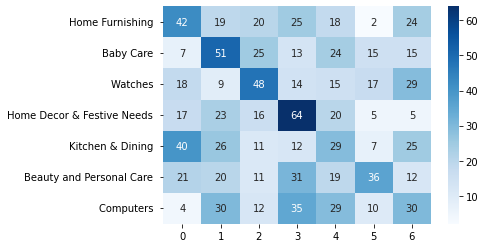

In [51]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

# <a name="C3"> III.) Algorithme CNN <a/>
    
CNN (Convolutional Neural Network). Les réseaux de neurones convolutifs (CNN) sont un type de réseau de neurones qui sont spécifiquement conçus pour traiter les données d'images. Ils utilisent des filtres pour détecter des motifs dans les images. Les filtres sont des matrices de poids qui sont apprises à partir d'un ensemble de données d'entraînement.
    
Les CNN sont capables d'apprendre des caractéristiques complexes à partir d'images. Ces caractéristiques sont apprises directement à partir des données pendant l'entraînement du réseau. Cependant, Il est moins rapide à exécuter et nécessite plus de données d'entraînement.
    
En général, les CNN sont mieux adaptés aux tâches qui nécessitent une grande précision, telles que la reconnaissance d'objets
    
VGG16 a été largement utilisé comme base pour des tâches de classification d'images, de détection d'objets et de segmentation sémantique.
    
######  <a href="#C"> Retour Sommaire <a/>

# Importation des librairies

In [52]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importation du dataset

In [53]:
from PIL import Image
from os import listdir

# Chemin vers le dossier contenant les images
repertoire_destination = "./Flipkart/images_renommees/"

# Compter le nombre fichier image dans le dossier
list_photos_nouv = [file for file in listdir(repertoire_destination)]
print(len(list_photos_nouv))

1050


In [54]:
data = pd.read_csv('data')
data.head()

,image,nouveau_nom,category,label
0,009099b1f6e1e8f893ec29a7023153c4.jpg,image_0.jpg,Watches,6
1,0096e89cc25a8b96fb9808716406fe94.jpg,image_1.jpg,Kitchen & Dining,5
2,00cbbc837d340fa163d11e169fbdb952.jpg,image_2.jpg,Home Furnishing,4
3,00d84a518e0550612fcfcba3b02b6255.jpg,image_3.jpg,Beauty and Personal Care,1
4,00e966a5049a262cfc72e6bbf68b80e7.jpg,image_4.jpg,Computers,2


In [55]:
data_sift = pd.read_csv('data_label')
data_sift.head()

,image,nouveau_nom,category,label,Label_sift
0,009099b1f6e1e8f893ec29a7023153c4.jpg,image_0.jpg,Watches,6,0
1,0096e89cc25a8b96fb9808716406fe94.jpg,image_1.jpg,Kitchen & Dining,5,6
2,00cbbc837d340fa163d11e169fbdb952.jpg,image_2.jpg,Home Furnishing,4,5
3,00d84a518e0550612fcfcba3b02b6255.jpg,image_3.jpg,Beauty and Personal Care,1,1
4,00e966a5049a262cfc72e6bbf68b80e7.jpg,image_4.jpg,Computers,2,1


In [56]:
list_labels = ['Home Furnishing ', 'Baby Care ', 'Watches ','Home Decor & Festive Needs ', 'Kitchen & Dining ',
               'Beauty and Personal Care ', 'Computers ']

## <a name="C31"> 3.1) Création du modèle pré-entraîné <a/>

In [57]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential

base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)
# model = VGG16(weights='imagenet', include_top=False)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## <a name="C32"> 3.2) Extraction de Features <a/>

### <a name="C321"> 3.2.1) Extraction des features des images <a/>

In [58]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential

# Définir une liste pour stocker les caractéristiques des images
images_features = []
i = 0
# Boucle pour extraire les caractéristiques de chaque image
for image_file in data["nouveau_nom"]:
    img_path = "./Flipkart/images_renommees/"
    if i % 100 == 0:
        print(i)
    i += 1
    image = load_img(img_path + image_file, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    
    # Prédire à partir du modèle pré-entraîné
    images_features.append(model.predict(image, verbose=0)[0])  

images_features = np.asarray(images_features)
images_features.shape

0
100
200
300


C:\Users\dmedc\anaconda3\lib\site-packages\PIL\Image.py:2896: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


400
500
600
700
800
900
1000


(1050, 4096)

### <a name="C322"> 3.2.2) Réduction dimension <a/>

#### Réduction de dimension PCA

In [59]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", images_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(images_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 4096)
Dimensions dataset après réduction PCA :  (1050, 803)


#### Réduction de dimension T-SNE

In [60]:
from sklearn import manifold, decomposition
import time

temps1 = time.time()


tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)
df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["category"]

print("Dimensions dataset après réduction PCA : ", df_tsne.shape)

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Dimensions dataset après réduction PCA :  (1050, 3)


In [61]:
df_tsne.head()

,tsne1,tsne2,class
0,-13.683022,-20.498709,Watches
1,-7.992173,-2.952870,Kitchen & Dining
2,27.073296,-3.276614,Home Furnishing
3,8.274518,28.933256,Beauty and Personal Care
4,7.239240,3.757224,Computers


## <a name="C33"> 3.3) Création de clusters <a/>

On effectue une classification non supervisée en utilisant l'algorithme **K-means** sur les données X_tsne 

In [62]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, n_init=100)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


In [63]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    171
1    182
2    156
3     80
4    144
5    179
6    138
Name: class, dtype: int64

#####  Analyse par classes

In [64]:
data_cnn = data_sift
data_cnn['Label_cnn'] = df_tsne["cluster"]
data_cnn.head()

,image,nouveau_nom,category,label,Label_sift,Label_cnn
0,009099b1f6e1e8f893ec29a7023153c4.jpg,image_0.jpg,Watches,6,0,4
1,0096e89cc25a8b96fb9808716406fe94.jpg,image_1.jpg,Kitchen & Dining,5,6,1
2,00cbbc837d340fa163d11e169fbdb952.jpg,image_2.jpg,Home Furnishing,4,5,5
3,00d84a518e0550612fcfcba3b02b6255.jpg,image_3.jpg,Beauty and Personal Care,1,1,6
4,00e966a5049a262cfc72e6bbf68b80e7.jpg,image_4.jpg,Computers,2,1,1


##### Export csv

In [65]:
data_cnn.to_csv(".\data_label",index=False)

## <a name="C34"> 3.4) Visualisation et Analyse <a/>

### <a name="C341"> 3.4.1) Analyse visuelle : affichage T-SNE selon catégories d'images <a/>

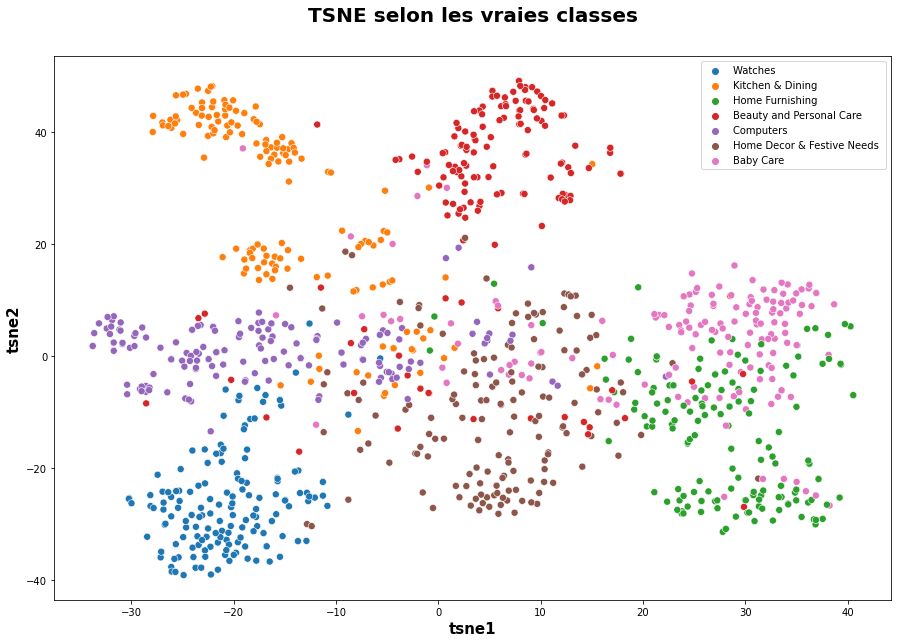

In [66]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50)

plt.title('TSNE selon les vraies classes', fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 15, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 15, fontweight = 'bold')
plt.legend(prop={'size': 10}) 

plt.show()

### <a name="C342"> 3.4.2) Analyse visuelle : affichage T-SNE selon clusters <a/>

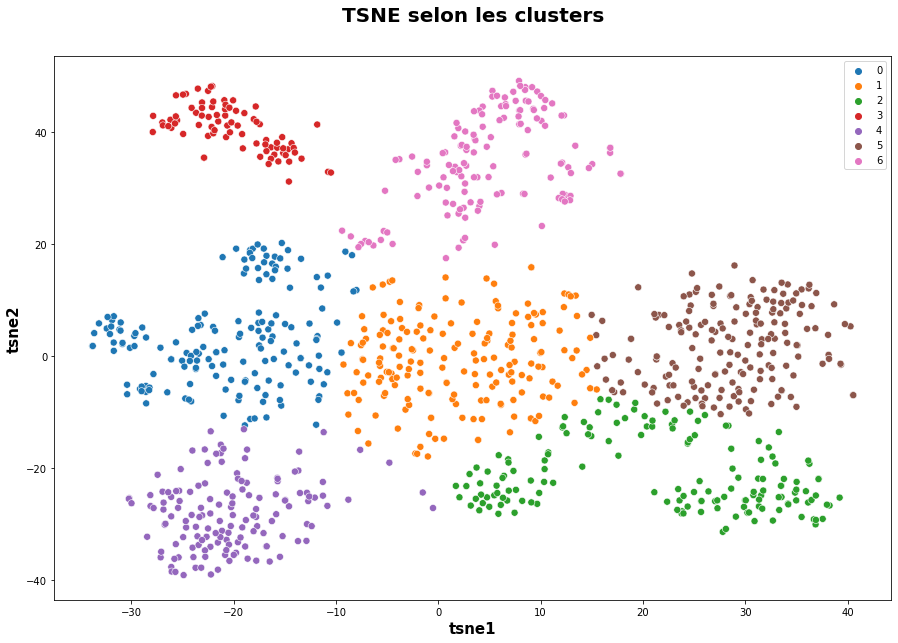

In [67]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="cluster", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50)

plt.title('TSNE selon les clusters', fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 15, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 15, fontweight = 'bold')
plt.legend(prop={'size': 10}) 

plt.show()

## <a name="C35"> 3.5) Evaluation du modèle CNN<a/>

### <a name="C351"> 3.5.1) Analyse de similarité entre catégories et clusters (ARI) <a/>

In [68]:
# Calcul ARI de similarité catégories images / clusters

labels = data["label"]
print("Le Score ARI est de : ", metrics.adjusted_rand_score(labels, cls.labels_))

Le Score ARI est de :  0.4505956708816032


### <a name="C352"> 3.5.2) Analyse de précision entre catégories et clusters (Accuracy) <a/>

#### Matrice de confusion

La matrice de confusion permet d'analyser les erreurs de classification commises par le modèle. En examinant les valeurs hors de la diagonale (les valeurs d'erreur), vous pouvez identifier quelles classes sont souvent confondues entre elles. Cela peut vous donner des indications sur les améliorations potentielles à apporter au modèle ou aux données pour améliorer les performances de classification.

In [69]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[  2  22  11   1   0 109   5]
 [  6  14   6   1   1   4 118]
 [108  38   0   0   1   1   2]
 [  6  78  52   0   8   5   1]
 [  0   4  87   0   0  59   0]
 [ 35  24   0  78   0   1  12]
 [ 14   2   0   0 134   0   0]]


La fonction **conf_mat_transform()** utilise une matrice de confusion pour attribuer une correspondance entre les valeurs prédites et les classes réelles, puis elle transforme les valeurs prédites en utilisant cette correspondance

In [70]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # Détermine la correspondance entre les classes originales et transformées
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    
    # Crée un DataFrame pandas avec les vraies étiquettes.
    labels = pd.Series(y_true, name="y_true").to_frame()
    # Ajouter les étiquettes prédites au DataFrame.
    labels['y_pred'] = y_pred
    # Transformer les étiquettes prédites à l'aide de la liste de correspondance obtenue formées au DataFrame.
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

#### Accuracy

In [71]:
cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [2 3 4 5 6 0 1]
[[109   5   2  22  11   1   0]
 [  4 118   6  14   6   1   1]
 [  1   2 108  38   0   0   1]
 [  5   1   6  78  52   0   8]
 [ 59   0   0   4  87   0   0]
 [  1  12  35  24   0  78   0]
 [  0   0  14   2   0   0 134]]

              precision    recall  f1-score   support

           0       0.61      0.73      0.66       150
           1       0.86      0.79      0.82       150
           2       0.63      0.72      0.67       150
           3       0.43      0.52      0.47       150
           4       0.56      0.58      0.57       150
           5       0.97      0.52      0.68       150
           6       0.93      0.89      0.91       150

    accuracy                           0.68      1050
   macro avg       0.71      0.68      0.68      1050
weighted avg       0.71      0.68      0.68      1050



#### Heatmap

<AxesSubplot:>

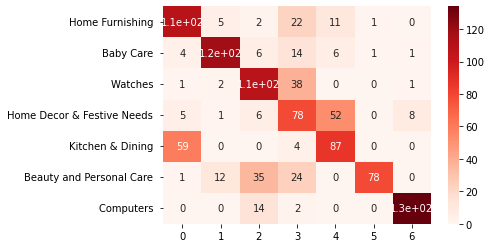

In [72]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Reds")

######  <a href="#C"> Retour Sommaire <a/>